# Building Classification model to predict credit card fraud
The aim of this project is to predict whether a credit card transaction is fraudulent or not, based on the transaction amount and other transaction related data. It aims to track down credit card transaction data, which is done by detecting anomalies in the transaction data. Credit card fraud detection is typically implemented using an algorithm that detects any anomalies in the transaction data and notifies the cardholder (as a precautionary measure) and the bank about any suspicious transaction.

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Display maximum number of columns
pd.pandas.set_option("display.max_columns",None)

In [3]:
#Importing data using reas csv method.
dataframe=pd.read_csv('creditcard.csv')
df=dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Class 0 = Non-Fraud Transaction

Class 1 = Fraud Transaction



In [4]:
#checking null values using isnull.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,7.094921e-13,1.875022e-12,1.053507e-12,7.137575e-13,-1.491369e-13,-5.225946e-13,-2.280687e-13,-6.428451e-13,4.958999e-13,7.060690e-13,1.766044e-12,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

<AxesSubplot:>

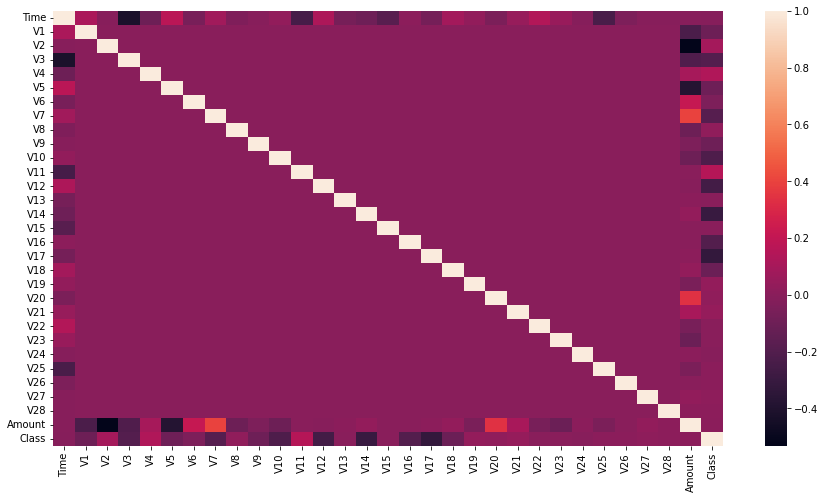

In [9]:
#Correlation matrix
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
#Finding duplicated rows available in the dataset
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [11]:
#Checking duplicated rows in a dataset
df.duplicated(keep='first').sum()

1081

#### 1081 duplicated rows are in dataset

In [12]:
#Visualizing some of original and duplicate rows using index method
df[30:36]
#here we can see the row 32 and 33 are same and same for row 34 and 35

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,-0.207358,-0.929182,0.527106,0.348676,-0.152535,-0.218386,-0.191552,-0.116581,-0.633791,0.348416,-0.066351,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
31,25.0,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,0.082262,1.133556,0.626699,-1.492780,0.520788,-0.674593,-0.529108,0.158256,-0.398751,-0.145709,-0.273832,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [13]:
#removing duplicated rows
df.drop_duplicates(keep='first',inplace=True)

In [14]:
#Checking for duplicates after the removing of duplicated rows
df.duplicated().sum()

0

<AxesSubplot:xlabel='Class', ylabel='Amount'>

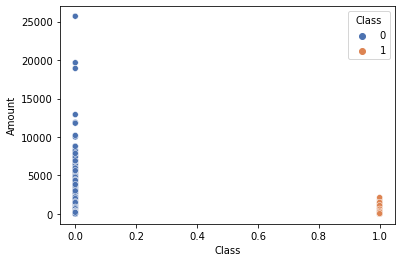

In [15]:
#The Amount involved in Fraud transactions are below 5000
sns.scatterplot(data=df, x="Class",y='Amount', hue="Class",ci=None, palette="deep")

In [16]:
# Number of 0 in a class column
len(df[df['Class']==0])

283253

In [17]:
# Number of 1 in a class column
len(df[df['Class']==1])

473

##### Dataset is highly imbalanced

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

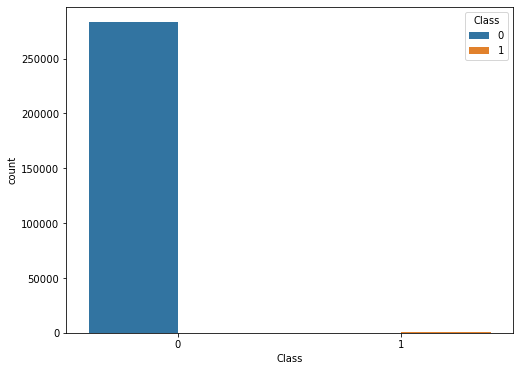

In [18]:
#Here we can see the dataset is totally unbalanced using countplot in seaborn library
plt.figure(figsize=(8,6))
sns.countplot(df['Class'],hue=df['Class'])

In [19]:
#Splitting data into independent and dependent features
x=df.drop(['Class'],axis=1)
y=df['Class']

In [20]:
# pip install imbalanced-learn to balance our dataset

In [21]:
#Implementing undersampling to handle imbalanced dataset
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
x_1, y_1 = under_sampler.fit_resample(x, y)

In [22]:
print(x_1.shape)
print(y_1.shape)

(946, 30)
(946,)


In [23]:
new_dataset=pd.concat([x_1,y_1], axis=1, ignore_index=True)

In [24]:
new_dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,87752.116279,-2.205588,1.740529,-3.361901,2.271936,-1.448094,-0.743623,-2.580646,0.466749,-1.260405,-2.760785,1.878797,-3.038110,-0.027371,-3.417436,-0.033663,-1.985701,-3.206846,-1.063530,0.307805,0.220955,0.229108,0.065468,-0.050228,-0.060999,0.022508,0.015778,0.103846,0.040264,103.050127,0.500000
std,47967.402382,5.331209,3.507927,6.018320,3.163506,4.119572,1.651546,5.560874,4.077630,2.299149,4.346660,2.729585,4.515126,1.069003,4.603849,0.970000,3.420678,5.929557,2.394092,1.287071,1.035301,2.006898,0.968541,1.099645,0.579444,0.700316,0.481803,0.915972,0.403088,253.988898,0.500264
min,52.000000,-30.552380,-11.025614,-31.103685,-4.147426,-22.105532,-7.585197,-43.557242,-41.044261,-13.434066,-24.588262,-2.622239,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.766638,-4.781606,-1.244491,-7.263482,-1.877151,0.000000,0.000000
25%,45142.750000,-2.630179,-0.053652,-4.967099,0.144588,-1.668083,-1.583377,-3.022498,-0.211018,-2.294381,-4.480683,-0.167718,-5.432738,-0.803002,-6.586982,-0.588423,-3.301484,-5.154957,-1.672316,-0.460719,-0.193573,-0.139809,-0.492591,-0.244266,-0.396292,-0.327921,-0.294324,-0.062592,-0.058866,1.290000,0.000000
50%,80683.000000,-0.751038,0.955959,-1.328651,1.375208,-0.365817,-0.670511,-0.572811,0.134264,-0.717998,-0.874932,1.052797,-0.806748,0.025591,-1.042698,0.009736,-0.537318,-0.506187,-0.319416,0.175706,0.020234,0.148917,0.066771,-0.035956,0.005581,0.057997,-0.027565,0.045713,0.031056,17.990000,0.500000
75%,134616.000000,1.079048,2.704868,0.340200,4.173454,0.453534,0.054064,0.304739,0.854243,0.177590,0.028142,3.524205,0.255615,0.727532,0.113807,0.637239,0.281126,0.303138,0.368169,0.982692,0.412588,0.617596,0.589020,0.190312,0.371656,0.429535,0.326594,0.421292,0.210821,99.990000,1.000000
max,171535.000000,2.289978,22.057729,2.979207,12.114672,11.095089,6.474115,7.924229,20.007208,6.152522,10.626924,12.018913,3.897595,2.852059,7.234249,2.543159,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,3.602057,2.208209,3.463246,3.052358,1.779364,3169.730000,1.000000


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

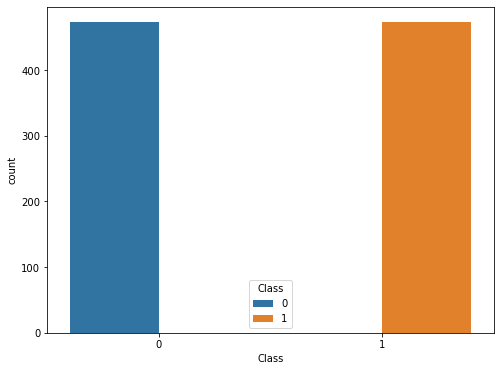

In [25]:
#Now our data is balaced
plt.figure(figsize=(8,6))
sns.countplot(y_1,hue=y_1)

In [26]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.2,random_state=0)

### Logical Regression Classifier

In [27]:
#Fitting our model in the logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=lr.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

confusion matrix:
 [[91  4]
 [ 7 88]]
Accuracy Score: 0.9421052631578948
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.96      0.93      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



### Decision Tree Classifier

In [30]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [31]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred1=dtc.predict(x_test)

In [33]:
# scores for decision tree
cm=confusion_matrix(y_test,y_pred1)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred1))
print('Classification Report:\n',classification_report(y_test,y_pred1))

confusion matrix:
 [[81 14]
 [ 8 87]]
Accuracy Score: 0.8842105263157894
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        95
           1       0.86      0.92      0.89        95

    accuracy                           0.88       190
   macro avg       0.89      0.88      0.88       190
weighted avg       0.89      0.88      0.88       190



### Random Forest Classifier

In [34]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
y_pred2=rfc.predict(x_test)

In [36]:
# scores for random forest classifier
cm=confusion_matrix(y_test,y_pred2)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print('Classification Report:\n',classification_report(y_test,y_pred2))

confusion matrix:
 [[90  5]
 [ 8 87]]
Accuracy Score: 0.9315789473684211
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.95      0.92      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



### Support Vector Classifier

In [37]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1e3, gamma=0.00001)

In [38]:
svc.fit(x_train,y_train)

SVC(C=1000.0, gamma=1e-05, kernel='linear')

In [39]:
y_pred3=svc.predict(x_test)

In [40]:
# scores for support vector machine
cm=confusion_matrix(y_test,y_pred3)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print('Classification Report:\n',classification_report(y_test,y_pred3))

confusion matrix:
 [[95  0]
 [16 79]]
Accuracy Score: 0.9157894736842105
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        95
           1       1.00      0.83      0.91        95

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



### K-Nearest Neighbor Classifier

In [41]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred4=classifier.predict(x_test)

In [43]:
# scores for knn neighbour
cm=confusion_matrix(y_test,y_pred4)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred4))
print('Classification Report:\n',classification_report(y_test,y_pred4))

confusion matrix:
 [[59 36]
 [40 55]]
Accuracy Score: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61        95
           1       0.60      0.58      0.59        95

    accuracy                           0.60       190
   macro avg       0.60      0.60      0.60       190
weighted avg       0.60      0.60      0.60       190



### Gaussian Naïve Bayes Classifier

In [44]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB()

In [45]:
y_pred5 = classifier.predict(x_test)  

In [46]:
# scores for naive_bayes
cm=confusion_matrix(y_test,y_pred5)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred5))
print('Classification Report:\n',classification_report(y_test,y_pred5))

confusion matrix:
 [[92  3]
 [26 69]]
Accuracy Score: 0.8473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        95
           1       0.96      0.73      0.83        95

    accuracy                           0.85       190
   macro avg       0.87      0.85      0.85       190
weighted avg       0.87      0.85      0.85       190



### XG Boost Classifier

In [47]:
#XGBoost Classifier
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)
xgb_cl.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred6=xgb_cl.predict(x_test)

In [49]:
cm=confusion_matrix(y_test,y_pred6)
print('confusion matrix:\n',cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred6))
print('Classification Report:\n',classification_report(y_test,y_pred6))

confusion matrix:
 [[88  7]
 [ 8 87]]
Accuracy Score: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.93      0.92      0.92        95

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



In [50]:
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [51]:
print("Logistic Regression Score      :",'{0:.1%}'.format(accuracy_score(y_test,y_pred)))
print('Decision Tree Classifier Score :','{0:.1%}'.format(accuracy_score(y_test,y_pred1)))
print('Random Forest Classifier       :','{0:.1%}'.format(accuracy_score(y_test,y_pred2)))
print('Support Vector Classifier Score:','{0:.1%}'.format(accuracy_score(y_test,y_pred3)))
print('KNN Classifier Score           :','{0:.1%}'.format(accuracy_score(y_test,y_pred4)))
print('Naive Bayes Classifier Score   :','{0:.1%}'.format(accuracy_score(y_test,y_pred5)))
print('XGBoost Classifier Score       :','{0:.1%}'.format(accuracy_score(y_test,y_pred6)))

Logistic Regression Score      : 94.2%
Decision Tree Classifier Score : 88.4%
Random Forest Classifier       : 93.2%
Support Vector Classifier Score: 91.6%
KNN Classifier Score           : 60.0%
Naive Bayes Classifier Score   : 84.7%
XGBoost Classifier Score       : 92.1%


### Conclusion

In final we have a accuracy score for different classification model, in that _Random Forest Classifier_ and _Logistic Regression Classifer_ are having the better accuracy than other model.